In [1]:
#Fastai imports --> they include a lot of the things we need
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append('/Users/chuanxu/fastai')
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

import matplotlib.pyplot as plt

In [2]:
# read in all the data
data = pd.read_csv('data/data_for_mapping_sensor')
test = pd.read_csv('data/test_for_mapping_sensor')
sensor = pd.read_csv('data/sensor_for_mapping_data')
parking = pd.read_csv('data/parkingrecords.csv')

### generate data for map

In [3]:
data1 = data[['Street_From_lat', 'Street_From_lng']].rename(columns={'Street_From_lat':'lat','Street_From_lng':'lng'})
data1['label'] = 'train/test'
data1.head()

,lat,lng,label
0,37.753846,-122.418619,train/test
1,37.784040,-122.419381,train/test
2,37.785660,-122.421476,train/test
3,37.753846,-122.418619,train/test
4,37.787084,-122.421757,train/test


In [4]:
test1 = test[['Street_From_lat', 'Street_From_lng']].rename(columns={'Street_From_lat':'lat','Street_From_lng':'lng'})
test1['label'] = 'train/test'
test1.head()

,lat,lng,label
0,37.792771,-122.407649,train/test
1,37.777313,-122.419633,train/test
2,37.780095,-122.420190,train/test
3,37.753846,-122.418619,train/test
4,37.781668,-122.415524,train/test


In [5]:
sensor1 = sensor[['STREET_BLOCK_lat', 'STREET_BLOCK_lng']].rename(columns={'STREET_BLOCK_lat':'lat','STREET_BLOCK_lng':'lng'})
sensor1['label'] = 'sensor'
sensor1.head()

,lat,lng,label
0,37.781464,-122.461253,sensor
1,37.781464,-122.461253,sensor
2,37.797099,-122.398361,sensor
3,37.796735,-122.399910,sensor
4,37.782793,-122.467643,sensor


In [6]:
parking1 = parking[['lat', 'lon']].rename(columns={'lat':'lat','lon':'lng'})
parking1['label'] = 'parking'
parking1.head()

,lat,lng,label
0,37.771637,-122.437112,parking
1,37.777229,-122.465370,parking
2,37.771172,-122.437683,parking
3,37.777328,-122.465012,parking
4,37.778664,-122.464111,parking


In [7]:
df = pd.concat([data1, test1, sensor1, parking1], axis=0)

In [8]:
groups = df.groupby('label')

### plot and save

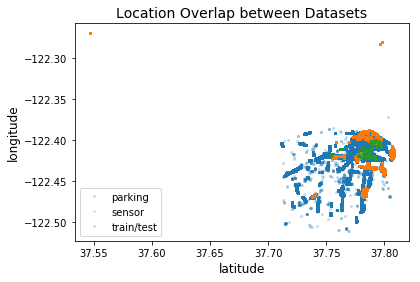

In [9]:
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.lat, group.lng, marker='o', linestyle='', ms=2, alpha=0.2,label=name)
ax.legend()
plt.title('Location Overlap between Datasets', fontsize=14)
plt.xlabel('latitude', fontsize=12)
plt.ylabel('longitude', fontsize=12)
plt.show()

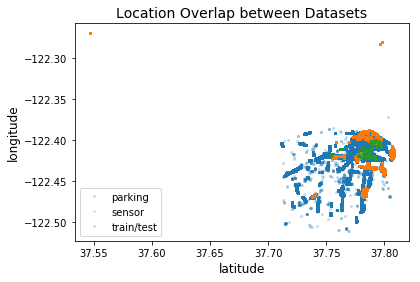

In [10]:
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.lat, group.lng, marker='o', linestyle='', ms=2, alpha=0.2, label=name)
ax.legend()
plt.title('Location Overlap between Datasets', fontsize=14)
plt.xlabel('latitude', fontsize=12)
plt.ylabel('longitude', fontsize=12)
plt.savefig('new_map')

### eliminate outliers

In [11]:
df = df.loc[df['lng'] < -122.35]

In [12]:
groups = df.groupby('label')

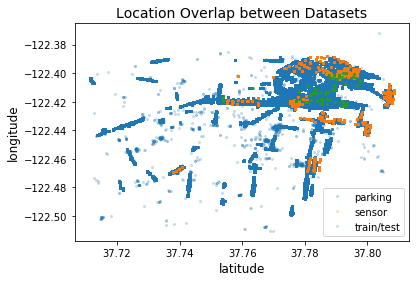

In [13]:
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.lat, group.lng, marker='o', linestyle='', ms=2, alpha=0.2, label=name)
ax.legend()
plt.title('Location Overlap between Datasets', fontsize=14)
plt.xlabel('latitude', fontsize=12)
plt.ylabel('longitude', fontsize=12)
plt.show()

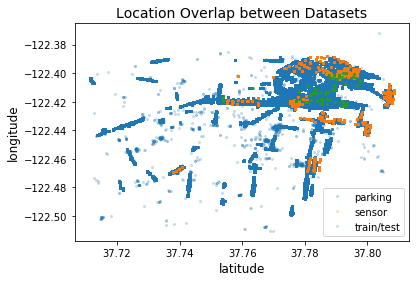

In [14]:
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.lat, group.lng, marker='o', linestyle='', ms=2, alpha=0.2,label=name)
ax.legend()
plt.title('Location Overlap between Datasets', fontsize=14)
plt.xlabel('latitude', fontsize=12)
plt.ylabel('longitude', fontsize=12)
plt.savefig('new_map_nooutliers')